In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\\Users\\HP\\Desktop\\ML_Prac')
train_data= pd.read_csv('finance_train.csv')
test_data= pd.read_csv('finance_test.csv')

In [3]:
train_data['age_band'].value_counts()

45-50      1091
36-40       911
41-45       889
51-55       856
31-35       841
55-60       834
26-30       750
61-65       702
65-70       480
22-25       359
71+         322
18-21        48
Unknown      41
Name: age_band, dtype: int64

In [4]:
train_data['age_band']=np.where(train_data['age_band'].str[:2]=='71','71-80',train_data['age_band'])

In [5]:
ddr=train_data.loc[train_data['age_band']=='Unknown']
ddr.index

Int64Index([ 238,  273,  302,  315,  330,  446,  599,  689,  793, 1591, 1649,
            2457, 2518, 2819, 2907, 3357, 3372, 3739, 3847, 4262, 4308, 4464,
            4882, 4901, 5417, 5430, 5580, 6114, 6349, 6652, 6699, 6802, 7113,
            7140, 7174, 7250, 7376, 7681, 7787, 7869, 7943],
           dtype='int64')

In [6]:
train_data.drop(ddr.index,inplace=True)

In [7]:
train_data['age_band'].value_counts()

45-50    1091
36-40     911
41-45     889
51-55     856
31-35     841
55-60     834
26-30     750
61-65     702
65-70     480
22-25     359
71-80     322
18-21      48
Name: age_band, dtype: int64

In [8]:
train_data[['Lage','Hage']]=train_data['age_band'].str.split("-",expand=True).astype(float)
train_data['age']=0.5*(train_data['Lage']+train_data['Hage'])
del train_data['age_band']

In [9]:
train_data['age'].value_counts()

47.5    1091
38.0     911
43.0     889
53.0     856
33.0     841
57.5     834
28.0     750
63.0     702
67.5     480
23.5     359
75.5     322
19.5      48
Name: age, dtype: int64

In [10]:
train_data['family_income'].value_counts()

>=35,000             2031
<27,500, >=25,000     978
<30,000, >=27,500     788
<25,000, >=22,500     676
<20,000, >=17,500     542
<12,500, >=10,000     536
<17,500, >=15,000     511
<15,000, >=12,500     497
<22,500, >=20,000     460
<10,000, >= 8,000     453
< 8,000, >= 4,000     320
< 4,000               222
Unknown                69
Name: family_income, dtype: int64

In [11]:
train_data['children']=train_data['children'].str.replace('Zero','0')
train_data['children']=np.where(train_data['children'].str[:1]=='4',4,train_data['children'])
train_data['children']=pd.to_numeric(train_data['children'],errors='coerce')

In [12]:
train_data.children.value_counts()

0    4930
1    1489
2    1279
3     373
4      12
Name: children, dtype: int64

In [13]:
train_data['Revenue.Grid']=(train_data['Revenue.Grid']==1).astype(int)

In [14]:
train_data['gender'].value_counts()

Female     6085
Male       1970
Unknown      28
Name: gender, dtype: int64

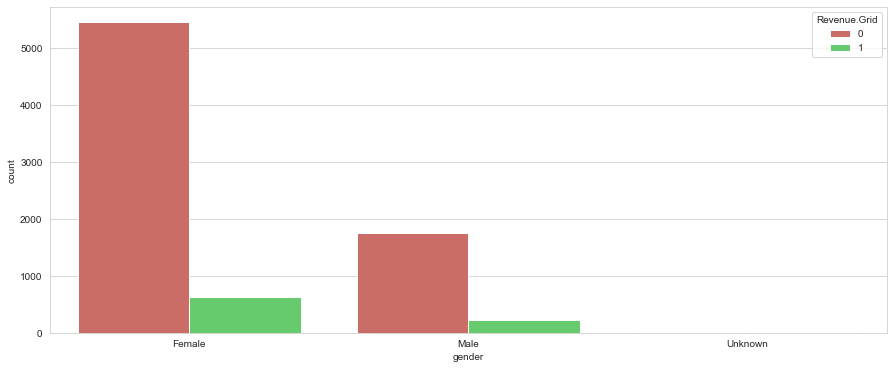

In [15]:
sns.set_style('whitegrid')
sns.set_palette('hls',3)
fig,ax=plt.subplots(figsize=(15,6))
ax=sns.countplot(x='gender',hue='Revenue.Grid',data=train_data)

In [16]:
gender_rev=pd.crosstab(index=train_data['gender'],columns=train_data['Revenue.Grid'])

In [17]:
gender_rev

Revenue.Grid,0,1
gender,,
Female,5450,635
Male,1751,219
Unknown,21,7


In [18]:
from scipy import stats
(chi2,p,dof,_)=stats.chi2_contingency([gender_rev.iloc[0].values,gender_rev.iloc[1].values,gender_rev.iloc[2].values])

In [19]:
print('chi2  :',chi2)
print('p-value   :',p)
print('Degree of freedom :' ,dof)

chi2  : 6.803326758043492
p-value   : 0.03331780370667719
Degree of freedom : 2


In [20]:
train_data['self_employed'].value_counts()

No     7514
Yes     569
Name: self_employed, dtype: int64

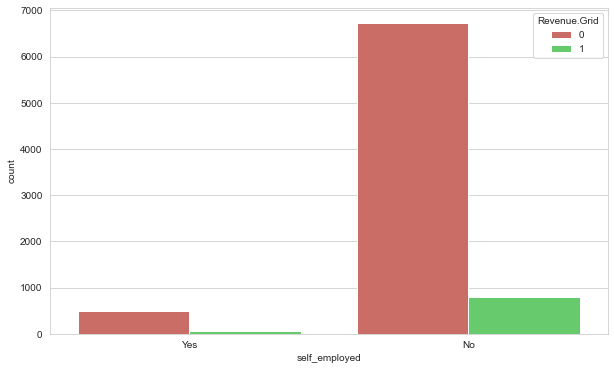

In [21]:
sns.set_style('whitegrid')
sns.set_palette('hls',3)
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.countplot(x='self_employed',hue='Revenue.Grid',data=train_data)

In [22]:
self_rev=pd.crosstab(index=train_data['self_employed'],columns=train_data['Revenue.Grid'])

In [23]:
self_rev

Revenue.Grid,0,1
self_employed,,
No,6722,792
Yes,500,69


In [24]:
(chi2,p,dof,_)=stats.chi2_contingency([self_rev.iloc[0].values,self_rev.iloc[1].values])

In [25]:
print('chi2  :',chi2)
print('p-value   :',p)
print('Degree of freedom :' ,dof)

chi2  : 1.2366586791866072
p-value   : 0.2661159808721003
Degree of freedom : 1


In [26]:
#Above result shows that self employed is insignificant column.

In [27]:
train_data['occupation'].value_counts()

Professional         1917
Retired              1763
Secretarial/Admin    1435
Housewife            1023
Business Manager      598
Manual Worker         452
Other                 426
Unknown               422
Student                47
Name: occupation, dtype: int64

In [28]:
occ_rev=pd.crosstab(index=train_data['occupation'],columns=train_data['Revenue.Grid'])

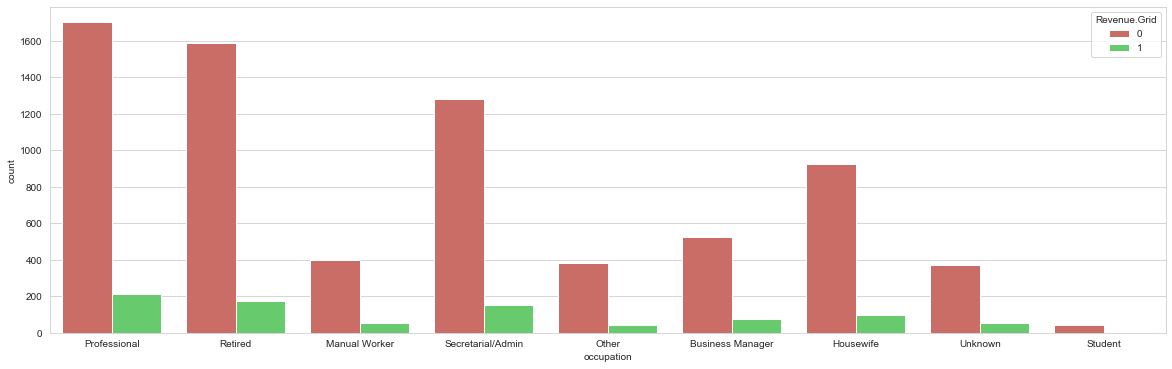

In [29]:
sns.set_style('whitegrid')
sns.set_palette('hls',3)
fig,ax=plt.subplots(figsize=(20,6))
ax=sns.countplot(x='occupation',hue='Revenue.Grid',data=train_data)

In [30]:
occ_rev

Revenue.Grid,0,1
occupation,,
Business Manager,525,73
Housewife,925,98
Manual Worker,401,51
Other,382,44
Professional,1703,214
Retired,1590,173
Secretarial/Admin,1283,152
Student,43,4
Unknown,370,52


In [31]:
(chi2,p,dof,_)=stats.chi2_contingency([occ_rev.iloc[0].values,occ_rev.iloc[1].values,
                                      occ_rev.iloc[2].values,occ_rev.iloc[3].values,occ_rev.iloc[4].values,
                                       occ_rev.iloc[5].values,occ_rev.iloc[6].values,occ_rev.iloc[7].values,
                                       occ_rev.iloc[8].values])

In [32]:
print('chi2  :',chi2)
print('p-value   :',p)
print('Degree of freedom :' ,dof)

chi2  : 6.291877426737268
p-value   : 0.6145732494774798
Degree of freedom : 8


In [33]:
train_data['home_status'].value_counts()

Own Home                7519
Rent from Council/HA     256
Rent Privately           207
Live in Parental Hom      84
Unclassified              17
Name: home_status, dtype: int64

In [34]:
home_rev=pd.crosstab(index=train_data['home_status'],columns=train_data['Revenue.Grid'])

In [35]:
(chi2,p,dof,_)=stats.chi2_contingency([home_rev.iloc[0].values,home_rev.iloc[1].values,
                                      home_rev.iloc[2].values,home_rev.iloc[3].values,
                                       home_rev.iloc[4].values])

In [36]:
print('chi2  :',chi2)
print('p-value   :',p)
print('Degree of freedom :' ,dof)

chi2  : 0.9325053176108642
p-value   : 0.9198517856383357
Degree of freedom : 4


In [37]:
#x.head()

In [38]:
train_data.select_dtypes(exclude=['object']).columns


Index(['REF_NO', 'children', 'year_last_moved',
       'Average.Credit.Card.Transaction', 'Balance.Transfer', 'Term.Deposit',
       'Life.Insurance', 'Medical.Insurance', 'Average.A.C.Balance',
       'Personal.Loan', 'Investment.in.Mutual.Fund',
       'Investment.Tax.Saving.Bond', 'Home.Loan', 'Online.Purchase.Amount',
       'Revenue.Grid', 'Investment.in.Commudity', 'Investment.in.Equity',
       'Investment.in.Derivative', 'Portfolio.Balance', 'Lage', 'Hage', 'age'],
      dtype='object')

In [39]:
df= train_data[['children','Home.Loan','Personal.Loan','Average.Credit.Card.Transaction','age',
                'Revenue.Grid']]

<AxesSubplot:>

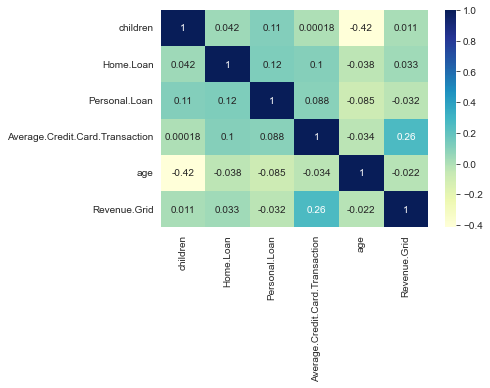

In [40]:
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")

In [41]:
df.head()

,children,Home.Loan,Personal.Loan,Average.Credit.Card.Transaction,age,Revenue.Grid
0,1,2.48,21.47,0.00,47.5,0
1,1,3.99,14.98,0.00,63.0,0
2,3,0.00,0.00,119.98,33.0,0
3,0,0.00,0.00,0.00,57.5,0
4,2,0.00,0.00,0.00,53.0,0


In [42]:
#sns.pairplot(df,diag_kind='kde',hue='Revenue.Grid')

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
children,8083.0,0.645058,0.916636,0.0,0.0,0.0,1.000,4.00
Home.Loan,8083.0,4.509077,10.034963,0.0,0.0,0.0,4.495,162.35
Personal.Loan,8083.0,26.058029,86.843065,0.0,0.0,0.0,21.990,4905.93
Average.Credit.Card.Transaction,8083.0,23.786264,51.559073,0.0,0.0,0.0,24.375,662.26
age,8083.0,46.647656,13.728233,19.5,38.0,47.5,57.500,75.50
Revenue.Grid,8083.0,0.106520,0.308521,0.0,0.0,0.0,0.000,1.00


In [44]:
df.age.value_counts()

47.5    1091
38.0     911
43.0     889
53.0     856
33.0     841
57.5     834
28.0     750
63.0     702
67.5     480
23.5     359
75.5     322
19.5      48
Name: age, dtype: int64

<AxesSubplot:xlabel='Personal.Loan', ylabel='Density'>

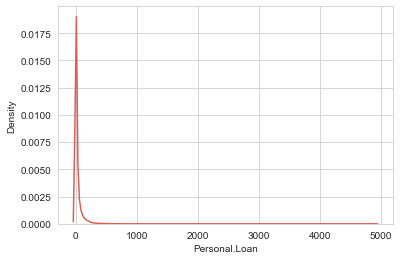

In [45]:
sns.kdeplot(df['Personal.Loan'])

<AxesSubplot:xlabel='Personal.Loan'>

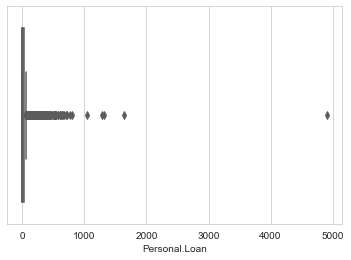

In [46]:
sns.boxplot(x=df['Personal.Loan'])

In [47]:
x=train_data.drop(['Revenue.Grid'],axis=1)

In [48]:
y=train_data['Revenue.Grid']

In [49]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [50]:
x.select_dtypes(['object']).columns

Index(['status', 'occupation', 'occupation_partner', 'home_status',
       'family_income', 'self_employed', 'self_employed_partner', 'TVarea',
       'post_code', 'post_area', 'gender', 'region'],
      dtype='object')

In [51]:
x.drop(['REF_NO','post_code','post_area','home_status','occupation'],axis=1,inplace=True)

In [52]:
cat_cols= x.select_dtypes(['object']).columns
cat_cols

Index(['status', 'occupation_partner', 'family_income', 'self_employed',
       'self_employed_partner', 'TVarea', 'gender', 'region'],
      dtype='object')

In [53]:
x.shape

(8083, 28)

In [54]:
print(x.status.nunique())
print(x.occupation_partner.nunique())
print(x.family_income.nunique())
print(x.region.nunique())

5
9
13
13


In [55]:
for col in cat_cols:
    dummy=pd.get_dummies(x[col],drop_first=True, prefix=col)
    x=pd.concat([x,dummy],axis=1)
    del x[col]
    print(col)
#del dummy

status
occupation_partner
family_income
self_employed
self_employed_partner
TVarea
gender
region


In [56]:
x.shape

(8083, 73)

In [57]:
del dummy

In [58]:
x.drop(['Lage','Hage'],axis=1,inplace=True)

In [59]:
x.isnull().sum()

children                           0
year_last_moved                    0
Average.Credit.Card.Transaction    0
Balance.Transfer                   0
Term.Deposit                       0
                                  ..
region_South East                  0
region_South West                  0
region_Unknown                     0
region_Wales                       0
region_West Midlands               0
Length: 71, dtype: int64

In [60]:
#Feature Selection
from sklearn.feature_selection import VarianceThreshold
var_thres= VarianceThreshold(threshold=0.001)
var_thres.fit(x)

VarianceThreshold(threshold=0.001)

In [61]:
sum(var_thres.get_support())

71

In [62]:
const_col=[column for column in x.columns if column not in x.columns[var_thres.get_support()]]
const_col

[]

In [63]:
from sklearn.feature_selection import mutual_info_classif
mutual_inf= mutual_info_classif(x,y)
#mutual_inf

In [64]:
mutual_inf= pd.Series(mutual_inf)
mutual_inf.index=x.columns
mutual_inf.sort_values(ascending=False)

Online.Purchase.Amount             0.096718
Investment.in.Equity               0.042307
Investment.Tax.Saving.Bond         0.037396
Investment.in.Commudity            0.030227
Life.Insurance                     0.028472
                                     ...   
family_income_<25,000, >=22,500    0.000000
family_income_<22,500, >=20,000    0.000000
family_income_<17,500, >=15,000    0.000000
family_income_<12,500, >=10,000    0.000000
occupation_partner_Other           0.000000
Length: 71, dtype: float64

In [65]:
red_col=[]
for i in mutual_inf.index:
    if mutual_inf.loc[i]==0:
        print(i)
        red_col.append(i)
        #print(red_col)
        #print(len(red_col))
    

age
status_Single/Never Married
occupation_partner_Housewife
occupation_partner_Other
occupation_partner_Secretarial/Admin
family_income_< 8,000, >= 4,000
family_income_<12,500, >=10,000
family_income_<17,500, >=15,000
family_income_<22,500, >=20,000
family_income_<25,000, >=22,500
family_income_<27,500, >=25,000
family_income_>=35,000
family_income_Unknown
self_employed_Yes
self_employed_partner_Yes
TVarea_Border
TVarea_Grampian
TVarea_Scottish TV
TVarea_Tyne Tees
TVarea_Ulster
TVarea_Unknown
gender_Male
gender_Unknown
region_East Anglia
region_North
region_North West
region_Northern Ireland
region_Scotland
region_South East
region_Unknown


In [66]:
red_col[:5]

['age',
 'status_Single/Never Married',
 'occupation_partner_Housewife',
 'occupation_partner_Other',
 'occupation_partner_Secretarial/Admin']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
     

In [68]:
X_train.shape

(6466, 71)

In [69]:
X_train_s= scaler.fit_transform(X_train)
X_test_s= scaler.transform(X_test)

In [70]:
X_train_s=pd.DataFrame(X_train_s,columns=X_train.columns)
X_test_s= pd.DataFrame(X_test_s,columns=X_test.columns)

In [71]:
X_train_s.head()

,children,year_last_moved,Average.Credit.Card.Transaction,Balance.Transfer,Term.Deposit,Life.Insurance,Medical.Insurance,Average.A.C.Balance,Personal.Loan,Investment.in.Mutual.Fund,...,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands
0,-0.704549,0.066581,0.115072,-0.291554,-0.508870,0.158747,-0.393561,2.524089,0.286972,0.367175,...,-0.041281,-0.245303,2.112143,-0.121458,-0.291062,-0.518016,-0.325080,-0.345349,-0.24174,-0.299114
1,-0.704549,0.089911,-0.461920,-0.571650,-0.508870,0.143444,-0.590143,-0.235402,-0.287974,-0.629621,...,-0.041281,-0.245303,-0.473453,-0.121458,-0.291062,-0.518016,3.076164,-0.345349,-0.24174,-0.299114
2,0.392396,0.159900,-0.461920,-0.571650,-0.508870,-0.484484,-0.590143,-0.442681,-0.287974,-0.361814,...,-0.041281,-0.245303,-0.473453,-0.121458,-0.291062,-0.518016,-0.325080,2.895620,-0.24174,-0.299114
3,1.489342,0.019921,-0.461920,-0.206112,-0.418792,-0.454081,-0.590143,-0.388076,-0.287974,-0.273091,...,-0.041281,-0.245303,-0.473453,-0.121458,-0.291062,1.930442,-0.325080,-0.345349,-0.24174,-0.299114
4,-0.704549,-0.026738,-0.461920,-0.571650,-0.148017,0.756476,-0.590143,-0.704564,-0.287974,-0.413916,...,-0.041281,4.076583,-0.473453,-0.121458,-0.291062,-0.518016,-0.325080,-0.345349,-0.24174,-0.299114


In [72]:
X_train_s.describe().T

,count,mean,std,min,25%,50%,75%,max
children,6466.0,1.822373e-15,1.000077,-0.704549,-0.704549,-0.704549,0.392396,3.683234
year_last_moved,6466.0,7.515581e-16,1.000077,-15.369932,0.012145,0.089911,0.136570,0.175453
Average.Credit.Card.Transaction,6466.0,-2.087807e-16,1.000077,-0.461920,-0.461920,-0.461920,0.007583,12.504434
Balance.Transfer,6466.0,-3.815211e-17,1.000077,-0.571650,-0.571650,-0.358470,0.255778,35.406411
Term.Deposit,6466.0,-5.125982e-16,1.000077,-0.508870,-0.508870,-0.508870,0.122759,13.658474
...,...,...,...,...,...,...,...,...
region_South East,6466.0,8.128357e-17,1.000077,-0.518016,-0.518016,-0.518016,-0.518016,1.930442
region_South West,6466.0,1.366745e-16,1.000077,-0.325080,-0.325080,-0.325080,-0.325080,3.076164
region_Unknown,6466.0,4.200338e-16,1.000077,-0.345349,-0.345349,-0.345349,-0.345349,2.895620
region_Wales,6466.0,-4.456517e-17,1.000077,-0.241740,-0.241740,-0.241740,-0.241740,4.136671


In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
params={'class_weight':['balanced',None],
        'penalty':['l1','l2'],
        'C':[.0001,.0005,.001,.005,.01,.05,.1,1,2,5]}

In [75]:
model=LogisticRegression(fit_intercept=True)

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
grid_search=GridSearchCV(model,
                         param_grid=params,
                         cv=10,
                         scoring="roc_auc",
                         n_jobs=-1,
                         verbose=20)

In [78]:
grid_search.fit(X_train_s,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.86375944        nan 0.85404621        nan 0.90585583
        nan 0.89552493        nan 0.92128458        nan 0.91385733
        nan 0.93862168        nan 0.93441836        nan 0.94277243
        nan 0.93794892        nan 0.94761616        nan 0.94102055
        nan 0.94825391        nan 0.94076985        nan 0.9480712
        nan 0.93871471        nan 0.94797478        nan 0.93837157
        nan 0.94785537        nan 0.93815066]
  warnings.warn(


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1,
                               2, 5],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=20)

In [79]:
grid_search.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced')

In [80]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.6f} (std: {1:.6f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [81]:
logr=grid_search.best_estimator_

In [82]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.948254 (std: 0.015346)
Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 2
Mean validation score: 0.948071 (std: 0.016014)
Parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 3
Mean validation score: 0.947975 (std: 0.016285)
Parameters: {'C': 2, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 4
Mean validation score: 0.947855 (std: 0.016469)
Parameters: {'C': 5, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 5
Mean validation score: 0.947616 (std: 0.015612)
Parameters: {'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l2'}



In [83]:
logr=LogisticRegression(fit_intercept=True,
                        **{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'},solver='liblinear')
# default solver lbfgs does not support l1 penalty for some versions of sklearn
# if you get an error like that , simply use solver='liblinear', it supports both l1 & l2 penalty


In [84]:
logr.fit(X_train_s,y_train)

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [85]:
(logr.coef_[0]==[0]).sum()

21

In [86]:
from sklearn.metrics import roc_auc_score
pred_y=logr.predict(X_test_s)

In [87]:
score=roc_auc_score(pred_y,y_test)
score

0.7861256544502618

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
clf = RandomForestClassifier()

In [91]:
X_train_s.shape

(6466, 71)

In [92]:
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [10,20,30,40,50,60,70],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [ ]:
# run randomized search
n_iter_search = 500
# n_iter parameter of RandomizedSeacrhCV controls, how many 
# parameter combination will be tried; out of all possible given values

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='roc_auc',
                                   cv=10,
                                  n_jobs=-1,verbose=20)
random_search.fit(X_train_s, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


In [ ]:
random_search.best_estimator_

In [ ]:
report(random_search.cv_results_,5)

In [91]:
rf=RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=50, max_features=20,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [92]:
rf.fit(X_train_s, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=50, max_features=20,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [93]:
feat_imp_df=pd.DataFrame({'features':X_train_s.columns,
                          'importance':rf.feature_importances_})

feat_imp_df=feat_imp_df.sort_values('importance',ascending=False)

In [94]:
feat_imp_df

,features,importance
12,Online.Purchase.Amount,2.446153e-01
10,Investment.Tax.Saving.Bond,1.310790e-01
2,Average.Credit.Card.Transaction,9.147204e-02
14,Investment.in.Equity,9.112224e-02
13,Investment.in.Commudity,7.101209e-02
...,...,...
58,gender_Unknown,4.446620e-05
64,region_Northern Ireland,2.916948e-05
20,status_Unknown,5.352545e-20
61,region_Isle of Man,0.000000e+00


In [95]:
from sklearn.metrics import roc_auc_score
pred_y=rf.predict(X_test_s)

In [96]:
score_rf=roc_auc_score(pred_y,y_test)
score_rf

0.89569686971916

In [97]:
from sklearn.svm import SVC

In [98]:
from scipy.stats import reciprocal, uniform
param_distributions = {"gamma": ['scale','auto'], "C": [13,4,5,7,8,9,10],
                       'kernel':['rbf','linear'],'class_weight':[None,'balanced']}

In [99]:
model= SVC()

In [100]:
grid_search=GridSearchCV(model,
                         param_grid=param_distributions,
                         cv=5,
                         scoring="roc_auc",
                         n_jobs=-1,
                         verbose=20)

In [101]:
grid_search.fit(X_train_s,y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [13, 4, 5, 7, 8, 9, 10],
                         'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='roc_auc', verbose=20)

In [ ]:
grid_search.best_estimator_

In [ ]:
final_model=grid_search.best_estimator_.fit(X_train_s,y_train)

In [ ]:
pred_y=final_model.predict(X_test_s)
score_rf=roc_auc_score(pred_y,y_test)

In [ ]:
score_rf

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix

In [ ]:
classification_report(y_test,pred_y)

In [ ]:
X_test_s.iloc[1]

In [ ]:
confusion_matrix = confusion_matrix(y_test, pred_y)

In [ ]:
confusion_matrix

In [ ]:
#plt.grid(False)
disp=plot_confusion_matrix(final_model,X_test_s,y_test,cmap='Blues')
#plt.show()

In [ ]:
cross_table = pd.crosstab(y_test,pred_y, rownames=['Actual'], colnames=['Predicted'], margins=True)
cross_table